In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/fooddata.csv")
print(data.head())
data.shape

   Age  Gender Occupation          Budget Educational Qualifications  \
0   20  Female    Student       No Income              Post Graduate   
1   24  Female    Student  Below Rs.10000                   Graduate   
2   22    Male    Student  Below Rs.10000              Post Graduate   
3   22  Female    Student       No Income                   Graduate   
4   22    Male    Student  Below Rs.10000              Post Graduate   

   Attendees  Pin code Output   Feedback Unnamed: 9  
0          4    560001    Yes   Positive        Yes  
1          3    560009    Yes   Positive        Yes  
2          3    560017    Yes  Negative         Yes  
3          6    560019    Yes   Positive        Yes  
4          4    560010    Yes   Positive        Yes  


(388, 10)

In [ ]:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.shape)

(301, 10)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=data.select_dtypes("object")
a.columns
data[a.columns]=data[a.columns].apply(le.fit_transform)

In [ ]:
x = data.iloc[:, [0,1,2,3,4,5,6,8]].values
y = data.iloc[:, 7].values

In [ ]:
# training a machine learning model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.10, random_state=42)

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
xtrain= st_x.fit_transform(xtrain)    
xtest= st_x.transform(xtest)

In [ ]:
# "Support vector classifier"  
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(xtest) 

In [ ]:
a=pd.DataFrame({"Actual":np.array(ytest).flatten(),"predicted":np.array(y_pred).flatten()})
a

,Actual,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,0
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report
model1 = print(classification_report(ytest, y_pred))
model1

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.97      0.91      0.94        35

    accuracy                           0.90        39
   macro avg       0.73      0.83      0.77        39
weighted avg       0.92      0.90      0.91        39



In [ ]:
#Train Accuracy: 
print(accuracy_score(ytrain, classifier.predict(xtrain)))

0.8624641833810889


In [ ]:
#Test Accuracy: 
print(accuracy_score(ytest, classifier.predict(xtest)))

0.8974358974358975


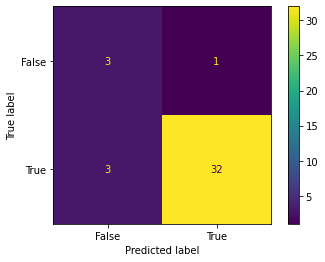

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred)
roc_auc = metrics.auc(fpr, tpr)

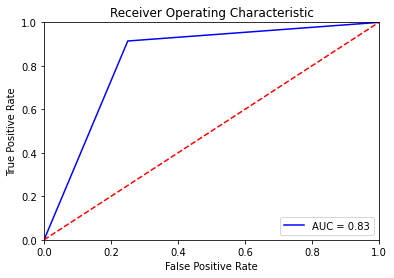

In [ ]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
d = int(input("Budget: "))
e = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
f = int(input("Attendees: "))
g = int(input("Pin Code: "))
h = int(input("Review of the Last Event (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h]])
print("Finding if the customer will order again: ", classifier.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 12
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 2
Budget: 12345
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 5
Attendees: 1
Pin Code: 12345
Review of the Last Event (1 = Positive, 0 = Negative): 1
Finding if the customer will order again:  [1]


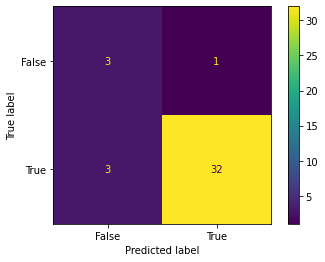

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()